# Support Vector Machine

What are our learning objectives for this lesson?

* Learn how to apply support vector machine in a classification problem
* Get familiar with the scikit-learn library 

In this lab, we will use the support vector machine to solve a classification problem. We will be examine an iris dataset where each flower in the dataset belongs to one of three specific species in the iris genus. Each flower is represetned by their features along with their classification. At the end of this lab, we should have a model that is able to reliably classify the irises as their respective species. 

Content used in this lesson is based upon information in the following sources:
* Marsland, Stephen. Machine Learning: An Algorithmic Perspective 2nd ed. (2015).
* Pedregosa et al., Scikit-learn: Machine Learning in Python, JMLR 12, pp.

## Lab Tasks 

1. Explore the Iris Dataset from scikit-learn
2. Split the data into a training set and a test set
3. Set up a support vector machine using scikit-learn
4. Train and Test the model

### Explor the Iris Dataset

The Iris data set was created by the British statistician and biologist Ronald Fisher. It was included in his 1936 paper *The Use of Multiple Measurements in Taxonomic Problems* as an example of linear discriminant analysis. This data sets is composed of 3 different types of irises: Setosa, Versicolour, and Virginica. 

Before Running the cell below, please make sure you have sklearn installed. Run ```pip install -U scikit-learn``` if you haven't installed it. 

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Import the Iris dataset from scikit-learn
iris = datasets.load_iris()

In [6]:
# TODO: Examine the Iris dataset. You can do that by printing out its features, 
#       its targets, or print out a portion of the data to examine its ranges.
#       
#       Documentation for the Iris dataset on scikit-learn: 
#       https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
list(iris.feature_names)
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

#### How many features are used to represent each flower? What are they? 

Now that we have a rough understanding of the structure of the dataset, let's plot some of the data points to visualize them using ```matplotlib```. There might be more features in the dataset than the maximum dimension supported by the library. In that case, reduce the dimension of the dataset so that that the number of features is the same as the number of dimensions for your visualization by one of the two methods:
1. By droping some features
2. Projecting your higher-dimensional data to a lower-dimensional space

To project the higher-dimensional data to a lower-dimensional space, we can use Singular Value Decomposition (SVD). This method of dimensionality reduction is availble in ```sklearn```. If you choose the second route to avoid loosing information from the dataset, you can add this import statement to perform SVD: ```from sklearn.decomposition import PCA```

#### 💁‍♀️ You are encourged to try both methods listed above. 

### Creating a 2D plot with Matplotlib

You could practice plotting in a 2D space first if you are new to plotting with Python. We will go through how to use matplotlib to visualize 2-dimensional data briefly. The steps in creating a 2D plot is: 
1. Decide what the $x$-axis and $y$-axis represent in your graph (i.e. which features do you want to use to visualize a data point)
2. Decide how the classification of each data point is represented (e.g. shape, color, size of markers)
3. Create a scatter plot using ```matplotlib.pyplot``` by passing it the arrays for $x$-axis and $y$-axis and other parameters where fit. 
4. Call ```plt.show()``` at the end to render the graph

### Creating a 3D plot with Matplolib

To plot a 3D graph using ```matplotlib```, set the projection parameter for a plot or subplot to ```'3d'```. We will also need to decide the data that defines the $x$, $y$, $z$ axes.

In [8]:
iris.target[:5]

array([0, 0, 0, 0, 0])

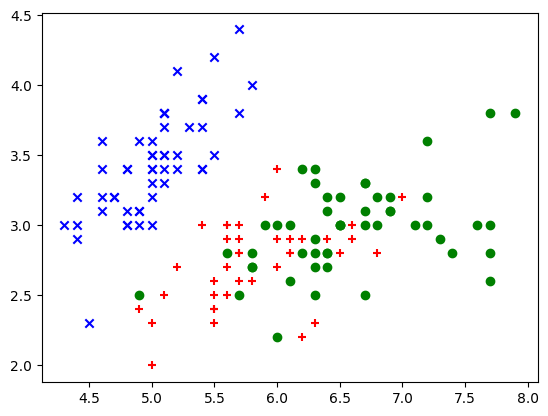

In [19]:
# TODO: Visualize the data using matplotlib.pyplot\
x = iris.data[:,0]
y = iris.data[:,1]
setosa = iris.data[:,0]
#seperating the classes
xs = [x[np.where(iris.target == 0)], x[np.where(iris.target == 1)], x[np.where(iris.target == 2)]]
ys = [y[np.where(iris.target == 0)], y[np.where(iris.target == 1)], y[np.where(iris.target == 2)]]
plt.scatter(xs[0],ys[0],color='blue',marker='x')
plt.scatter(xs[1],ys[1],color='red',marker='+')
plt.scatter(xs[2],ys[2],color='green',marker='o')

### Spliting the dataset

We want to split the data into a train and test subsets. There are 2 steps in spliting the data:
1. Preprocess the data 
2. Split the data into random train and test subsets

#### Preprocessing the Data

Before we split the data, we want to make sure we can visualize the desicion boundry of the SVM later on. To do that, we need to reduce the higher-dimensional dataset to a 2D dataset. We can do this by either:
1. dropping some features, or 
2. projecting the dataset down to 2D using Singlular Value Decomposition (SVD)

If you choose the second route to avoid loosing information from the dataset, you can add this import statement to perform SVD: ```from sklearn.decomposition import PCA```

#### Spliting the Dataset into Random Train and Test Subsets

For the Iris dataset, the data is organized by their classifications. Irises that are classified as Setosa are enlisted in the set first, followed by irises that are classified as Versicolour, then Virginica. We want to make sure that both the train and test subsets are representative of the original dataset. So, instead of spliting the Iris dataset in its original order, it might make sense for us to create a way to create the train and test set by randomly retrieving unique entries from the original dataset. 

You are asked to implement a solution without the help of scikit-learn. Think of a way to split the dataset so that you end up with two subsets with non-overlapping entries which samples from the original dataset.

At the end, we should have 4 sets of data objects:
1. Training input data
2. Training targets
3. Testing input data
4. Testing targets

#### A note on the lack of Validation Set for our training
Recall that in textbook 2.2.2 (p. 20), we learned about the 3 types of datasets for machine learnin purposes: training, testing, and validation set. You might be wondering why don't we need a validation set for this problem. This is because, for this lab, we will be training the model without fine-tuning its hyperparameters during the training process. For a more complex learning problem, though, we may consider also creating a validation set so that we may evaluate the model's performance during training, and make adjustments to its hyperparameters accordingly. 


In [ ]:
# TODO: Preprocess the data
reduced_data = ???

# TODO: Split the data into two sets
???

### Set Up a Support Vector Machine & Training the Classifier

In the beginning of this lab, we introduced the origin of the Iris dataset. We know that this dataset was used as an example of linear discriminant analysis. Using this fact, select a support vector classifier from ```sklearn.svm``` as our SVM for the classification of this dataset. 

After setting up one of scikit-learn's support vector machines, training is done with just one line of code. Your model should be trained before we move on to visualizing the decision boundries. 

In [ ]:
# TODO: Pick a SVM from sklearn.svm
from sklearn.svm import ???

In [ ]:
# TODO: Set up the classifer and train it
???

### Visualizing the Decision Boundries
Sometimes, it might be helpful to visualize our classifer's behavior by visualization its decision boundries. Scikit-learn has a function that does exactly that, so we should take advantage of that. Plot decision boundries using ```DecisionBoundaryDisplay```. The required module is imported for you below. Please see the documentation for this function to determine how to plot it. You will need to use scikit-learn with matplotlib for this task. 

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# TODO: Use both matplotlib.pyplot and sklearn.inspection.DecisionBoundaryDisplay 
#       to visualize the learned decision boundries 
???

### Testing the Classifier

To test the classifier, we feed the test set into the classifer and have it predict the classes of the test inputs. Additional to obtaining the classifier's prediction for the test set, it might also be interesting to look at the confusion matrix and the accuracy of the prediction to get a general sense on how it's performing. 

Unlike binary classification, there are no positive or negative classes in a confusion matrix for a 3-class classifier. 

The rows and columns are organized as below:



|                   |Setosa (actual)|Versicolour (actual)|Virginica (actual)|
|-------------------|---------------|--------------------|------------------|
|Setosa (pred.)     | correct pred. |  incorrect pred.   |  incorrect pred. |
|Versicolour (pred.)|incorrect pred.|    correct pred.   |  incorrect pred. |
|Virginica (pred.)  |incorrect pred.|  incorrect pred.   |    correct pred. |

Use the imported ```metrics``` module to see how well your classifier is performing.

In [ ]:
from sklearn import metrics

# TODO: Get the classifier's prediction on the test set
???

# TODO: Calculate the accuracy and the confusion matrix using sklearn.metrics
print("Accuracy: ",???)
print("Confusion Matrix:\n", ???)

## Bonus Task

Try to improve the accuracy of the prediction by any mean. For example, you could try to use a different SVM model, or you might perform regularization as a preprocessing step in the pipline, or you might adjust the hyperparameters. 

In [ ]:
# TODO: Get a better accuracy score by any mean!
